# ClusterViz Tutorial: Comprehensive Clustering Analysis

# Introduction and problem statement

Clustering is an unsupervised learning technique. Instead of relying on predefined labels, as in supervised learning, clustering tries to discover natural groupings that are hidden in the data. Since it attempts to uncover hidden patterns, it is widely used in market research, image segmentation (separating parts of an image, such as in medical imaging), anomaly detection (e.g, fraud and system failures), customer segmentation (grouping customers by their behavior or preferences), and other applications.  


ClusterViz was built to make working with clustering easier and more intuitive. Instead of writing everything from scratch, it provides a unified interface with key functionality such as multiple clustering algorithms (KMeans, DBSCAN, Agglomerative, GMM), comprehensive evaluation metrics (e.g., Davies–Bouldin, silhouette score), rich visualizations to help interpret results, and model comparison and selection tools to choose the best setup.  

ClusterViz is a practical tool for experimenting with, comparing, and understanding clustering algorithms.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clusterviz import Preprocessor, Clusterer, Evaluator
from clusterviz.datasets import load_iris, make_blobs_dataset, load_customer_data

# Dataset loading

In [2]:
# Loading the Iris dataset, which is a classic dataset in machine learning.
# It contains 150 samples of iris flowers with 4 features each
X_iris, y_iris = load_iris()
print("Iris X shape:", X_iris.shape)    
print("Iris y shape:", y_iris.shape)          

 
# A "blobs" dataset is a synthetic dataset used for clustering experiments.
# Points are generated around specified centers, forming groups (clusters).

X_blobs, y_blobs = make_blobs_dataset(n_samples=100, centers=3, n_features=2)
print("Blobs X shape:", X_blobs.shape)   
print("Blobs y shape:", y_blobs.shape)       

# Loading synthetic customer data
# We will mainly work with the iris and blobs dataset throughout this tutorial

df = load_customer_data(n_customers=200)
print("Customer data columns:", df.columns.tolist())
print("First 5 rows:\n", df.head())


Iris X shape: (150, 4)
Iris y shape: (150,)
Blobs X shape: (100, 2)
Blobs y shape: (100,)
Customer data columns: ['age', 'annual_income', 'spending_score', 'purchase_frequency']
First 5 rows:
          age  annual_income  spending_score  purchase_frequency
0  40.960570   57155.747207              99                   7
1  33.340828   61215.690527               1                   2
2  42.772262   71661.024864              21                   3
3  53.276358   71076.041041              55                   5
4  32.190160   22446.612641               6                   8


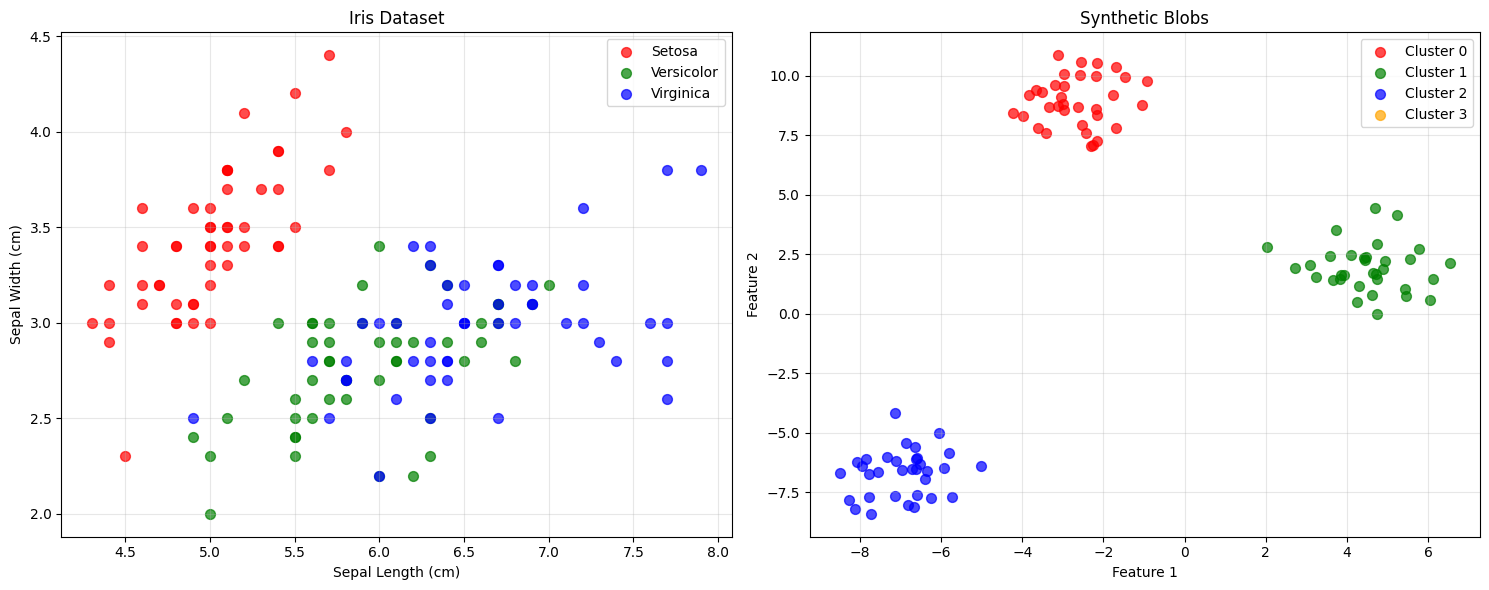

In [3]:
# Visualizing the raw datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Iris dataset visualization
iris_colors = ['red', 'green', 'blue']
iris_labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    mask = y_iris == i
    ax1.scatter(X_iris[mask, 0], X_iris[mask, 1], 
               c=iris_colors[i], alpha=0.7, label=iris_labels[i], s=50)

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Iris Dataset')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Synthetic blobs visualization
blob_colors = ['red', 'green', 'blue', 'orange']

for i in range(4):
    mask = y_blobs == i
    ax2.scatter(X_blobs[mask, 0], X_blobs[mask, 1], 
               c=blob_colors[i], alpha=0.7, label=f'Cluster {i}', s=50)

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Synthetic Blobs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Data preprocessing

In [4]:
# Initializing the preprocessors
preprocessor_iris = Preprocessor()
preprocessor_blobs = Preprocessor()

# Preprocessing the data
X_iris_scaled = preprocessor_iris.fit_transform(X_iris, scale=True, pca_components=2)
X_blobs_scaled = preprocessor_blobs.fit_transform(X_blobs, scale=True)

print(f"Iris preprocessed: {X_iris.shape} → {X_iris_scaled.shape}")
print(f"Blobs preprocessed: {X_blobs.shape} → {X_blobs_scaled.shape}")

# Showing explained variance for Iris PCA
explained_var = preprocessor_iris.get_explained_variance_ratio()
if explained_var is not None:
    print(f"  PCA Explained Variance: {explained_var}")
    print(f"  Total Variance Explained: {explained_var.sum():.2%}")

Iris preprocessed: (150, 4) → (150, 2)
Blobs preprocessed: (100, 2) → (100, 2)
  PCA Explained Variance: [0.72962445 0.22850762]
  Total Variance Explained: 95.81%


The preprocessing ensures that features are on the same scale and reduces dimensionality for datasets like Iris, which improves clustering performance and visualization. The original Iris dataset had 4 features reduced to 2 principal components using PCA. The first 2 components capture 95.81% of the total variance, meaning most of the information is retained. The Blobs dataset already has 2 features, scaled, but no dimensionality reduction has been applied. 

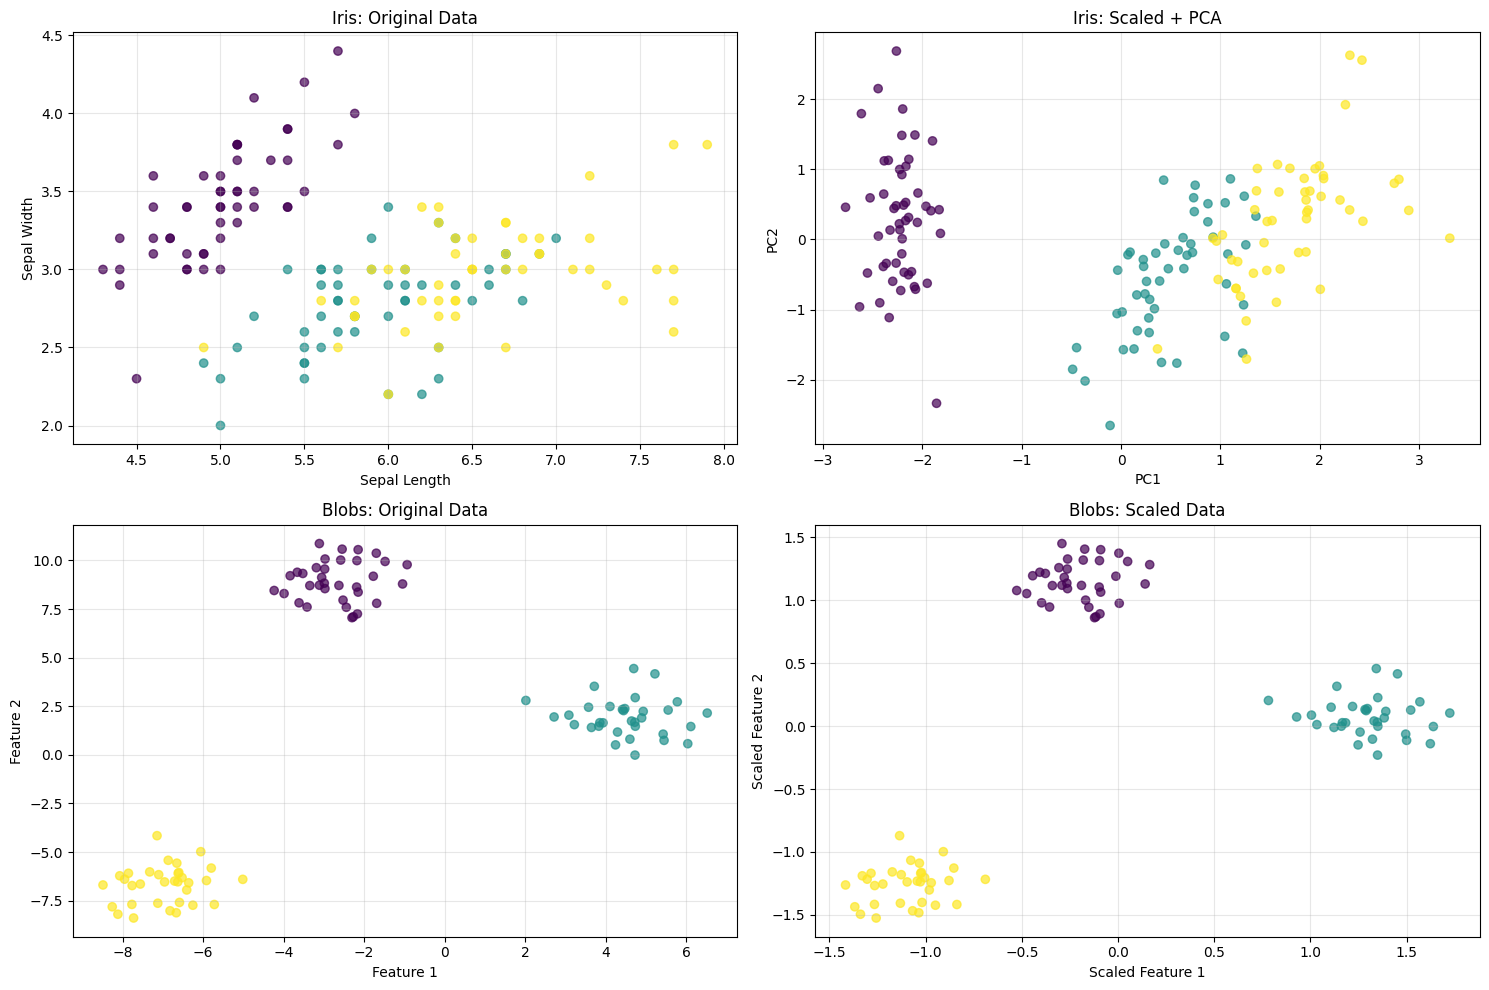

In [5]:
# Visualizing the preprocessing effects
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original vs scaled Iris
axes[0,0].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
axes[0,0].set_title('Iris: Original Data')
axes[0,0].set_xlabel('Sepal Length')
axes[0,0].set_ylabel('Sepal Width')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
axes[0,1].set_title('Iris: Scaled + PCA')
axes[0,1].set_xlabel('PC1')
axes[0,1].set_ylabel('PC2')
axes[0,1].grid(True, alpha=0.3)

# Original vs scaled Blobs
axes[1,0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', alpha=0.7)
axes[1,0].set_title('Blobs: Original Data')
axes[1,0].set_xlabel('Feature 1')
axes[1,0].set_ylabel('Feature 2')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1], c=y_blobs, cmap='viridis', alpha=0.7)
axes[1,1].set_title('Blobs: Scaled Data')
axes[1,1].set_xlabel('Scaled Feature 1')
axes[1,1].set_ylabel('Scaled Feature 2')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# DBSCAN Clustering
In this section, we examine how DBSCAN behaves under different parameter choices.
DBSCAN has two key parameters:

1)eps – the maximum distance between two samples to be considered neighbors.

2)min_samples – the minimum number of points required to form a dense region.

We sweep across multiple values of eps and min_samples for two datasets (Iris and synthetic Blobs).
For each combination, we recorded the number of clusters found, the number of noise points, the 
silhouette score when at least 2 clusters are formed, and the Davies–Bouldin index (DBI), which 
measures cluster separation and compactness (lower = better). Including both silhouette and 
Davies–Bouldin gives a more complete view of clustering quality, since the silhouette rewards 
separation, while DBI penalizes overlapping or dispersed clusters. This helps us understand the 
sensitivity of DBSCAN to parameter tuning and compare its clustering performance across datasets.

This script also selects the “best” DBSCAN result for each dataset, based on the highest silhouette score. DBI values are reported alongside for additional insight into cluster quality. The selected best DBSCAN results are plotted to visualize the cluster assignments. This helps interpret the effect of the
parameter choices and compare cluster structures between datasets.

In [6]:
# Initializing Clusterer and Evaluator
clusterer = Clusterer()
evaluator = Evaluator()

# DBSCAN parameter grids
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7]

dbscan_results = []

print("\nDBSCAN Parameter Sweep:")
print("Dataset | eps | min_samples | n_clusters | n_noise | silhouette | davies_bouldin")
print("-" * 80)

# Looping over datasets and parameter combinations
for dataset_name, X in [("Iris", X_iris_scaled), ("Blobs", X_blobs_scaled)]:
    for eps in eps_values:
        for min_samples in min_samples_values:
            result = clusterer.fit_dbscan(X, eps=eps, min_samples=min_samples)
            
            if result['n_clusters'] >= 2:
                sil_score = evaluator.silhouette(X, result['labels'])
                dbi_score = evaluator.davies_bouldin(X, result['labels'])
                dbscan_results.append({
                    'dataset': dataset_name, 
                    'result': result, 
                    'silhouette': sil_score, 
                    'dbi': dbi_score,
                    'X': X
                })
            else:
                sil_score = -1
                dbi_score = float('inf')
            
            print(f"{dataset_name:7} | {eps:3.1f} | {min_samples:11} | "
                  f"{result['n_clusters']:10} | {result['n_noise']:7} | "
                  f"{sil_score:10.3f} | {dbi_score:12.3f}")






DBSCAN Parameter Sweep:
Dataset | eps | min_samples | n_clusters | n_noise | silhouette | davies_bouldin
--------------------------------------------------------------------------------
Iris    | 0.3 |           3 |          5 |      19 |      0.172 |        2.399
Iris    | 0.3 |           5 |          5 |      33 |      0.107 |        2.517
Iris    | 0.3 |           7 |          4 |      61 |      0.099 |        2.913
Iris    | 0.5 |           3 |          2 |       7 |      0.557 |        3.256
Iris    | 0.5 |           5 |          2 |      12 |      0.525 |        5.532
Iris    | 0.5 |           7 |          2 |      15 |      0.516 |        4.235
Iris    | 0.7 |           3 |          3 |       1 |      0.442 |        0.444
Iris    | 0.7 |           5 |          2 |       5 |      0.571 |        1.764
Iris    | 0.7 |           7 |          2 |       8 |      0.560 |        2.613
Iris    | 1.0 |           3 |          2 |       1 |      0.538 |        0.450
Iris    | 1.0 |        


Best DBSCAN Results (by silhouette score):
  Iris: eps=1.0, silhouette=0.572, DBI=2.628
  Blobs: eps=0.3, silhouette=0.849, DBI=0.210


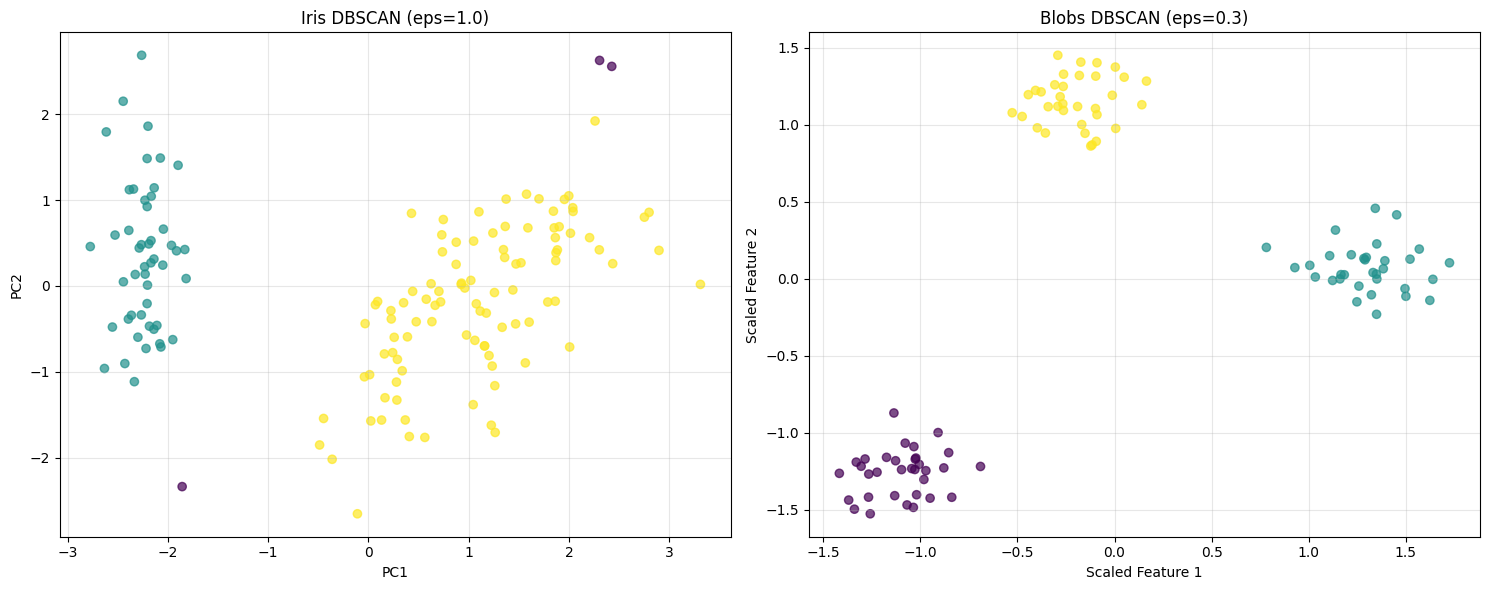

In [19]:
# Selecting the best DBSCAN results by silhouette score
if dbscan_results:
    iris_dbscan_best = max([r for r in dbscan_results if r['dataset'] == 'Iris'], 
                    key=lambda x: x['silhouette'])
    blobs_dbscan_best = max([r for r in dbscan_results if r['dataset'] == 'Blobs'], 
                     key=lambda x: x['silhouette'])
    
    print("\nBest DBSCAN Results (by silhouette score):")
    print(f"  Iris: eps={iris_dbscan_best['result']['params']['eps']}, "
          f"silhouette={iris_dbscan_best['silhouette']:.3f}, "
          f"DBI={iris_dbscan_best['dbi']:.3f}")
    print(f"  Blobs: eps={blobs_dbscan_best['result']['params']['eps']}, "
          f"silhouette={blobs_dbscan_best['silhouette']:.3f}, "
          f"DBI={blobs_dbscan_best['dbi']:.3f}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.scatter(iris_dbscan_best['X'][:, 0], iris_dbscan_best['X'][:, 1], 
                c=iris_dbscan_best['result']['labels'], cmap='viridis', alpha=0.7)
    ax1.set_title(f"Iris DBSCAN (eps={iris_dbscan_best['result']['params']['eps']})")
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.grid(True, alpha=0.3)
    
    ax2.scatter(blobs_dbscan_best['X'][:, 0], blobs_dbscan_best['X'][:, 1], 
                c=blobs_dbscan_best['result']['labels'], cmap='viridis', alpha=0.7)
    ax2.set_title(f"Blobs DBSCAN (eps={blobs_dbscan_best['result']['params']['eps']})")
    ax2.set_xlabel('Scaled Feature 1')
    ax2.set_ylabel('Scaled Feature 2')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Interpreting the results 

For the Iris dataset, DBSCAN shows high sensitivity to parameter settings. Small eps values lead 
to fragmented clusters with low silhouette and high Davies–Bouldin scores, indicating poor separation. 
As eps increases (0.5–1.0), the clustering stabilizes into 2–3 groups with stronger silhouette scores (≈0.5) and lower DBI values, suggesting more coherent structure.

For the Blobs dataset, DBSCAN consistently recovers the true 3 clusters across all parameter settings,
with a high silhouette (≈0.85) and very low DBI (≈0.21). This confirms that DBSCAN performs robustly on 
well-separated data, while more complex datasets like Iris require careful parameter tuning.

Best model selection:
DBSCAN results change significantly with the eps and min_samples parameters. Small adjustments can affect the number of clusters and noise points. Iris has overlapping clusters, resulting in a moderate silhouette and higher DBI. Blobs have well-separated, compact clusters, resulting in high silhouette and very low DBI. This demonstrates the importance of parameter tuning and using multiple evaluation metrics when working with DBSCAN.

# KMeans Clustering

In [8]:
print("Finding optimal number of clusters using Elbow Method...")

# Grid search for optimal k
k_range = range(2, 8)
iris_grid_results = evaluator.grid_search_kmeans(X_iris_scaled, k_range)
blobs_grid_results = evaluator.grid_search_kmeans(X_blobs_scaled, k_range)

print("\nKMeans Grid Search Results:")
print("Iris:")
print(iris_grid_results.round(3))
print("\nBlobs:")
print(blobs_grid_results.round(3))

Finding optimal number of clusters using Elbow Method...

KMeans Grid Search Results:
Iris:
   k  inertia  silhouette  davies_bouldin  calinski_harabasz
0  2  197.404       0.615           0.544            283.005
1  3  115.021       0.509           0.710            293.857
2  4   89.341       0.441           0.755            264.488
3  5   66.199       0.416           0.771            278.549
4  6   57.159       0.414           0.759            260.857
5  7   47.830       0.415           0.778            262.627

Blobs:
   k  inertia  silhouette  davies_bouldin  calinski_harabasz
0  2   62.807       0.687           0.459            214.067
1  3    5.590       0.849           0.210           1686.708
2  4    4.761       0.677           0.617           1312.251
3  5    4.035       0.511           0.836           1153.376
4  6    3.309       0.356           1.024           1117.383
5  7    2.893       0.364           0.901           1056.192


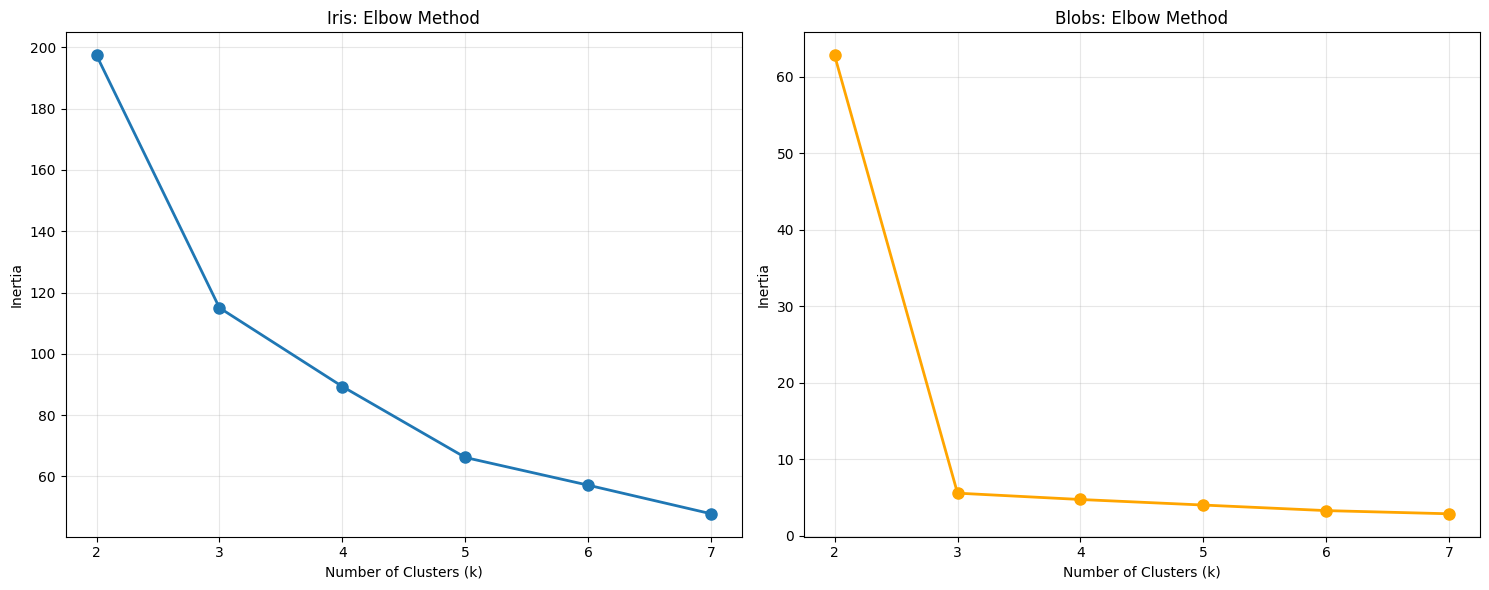

In [9]:
# Plot elbow curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Iris elbow
ax1.plot(iris_grid_results['k'], iris_grid_results['inertia'], 
         marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Iris: Elbow Method')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(iris_grid_results['k'])

# Blobs elbow
ax2.plot(blobs_grid_results['k'], blobs_grid_results['inertia'], 
         marker='o', linewidth=2, markersize=8, color='orange')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Blobs: Elbow Method')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(blobs_grid_results['k'])

plt.tight_layout()
plt.show()

In [10]:
# Find best k values
best_k_iris = iris_grid_results.loc[iris_grid_results['silhouette'].idxmax(), 'k']
best_k_blobs = blobs_grid_results.loc[blobs_grid_results['silhouette'].idxmax(), 'k']

print(f"Best k for Iris: {best_k_iris}")
print(f"Best k for Blobs: {best_k_blobs}")

# Fit KMeans with optimal k
iris_kmeans = clusterer.fit_kmeans(X_iris_scaled, k=int(best_k_iris))
blobs_kmeans = clusterer.fit_kmeans(X_blobs_scaled, k=int(best_k_blobs))

iris_silhouette = evaluator.silhouette(X_iris_scaled, iris_kmeans['labels'])
blobs_silhouette = evaluator.silhouette(X_blobs_scaled, blobs_kmeans['labels'])

print(f"\nKMeans Results:")
print(f"   Iris (k={best_k_iris}): Silhouette = {iris_silhouette:.3f}")
print(f"   Blobs (k={best_k_blobs}): Silhouette = {blobs_silhouette:.3f}")


Best k for Iris: 2
Best k for Blobs: 3

KMeans Results:
   Iris (k=2): Silhouette = 0.615
   Blobs (k=3): Silhouette = 0.849


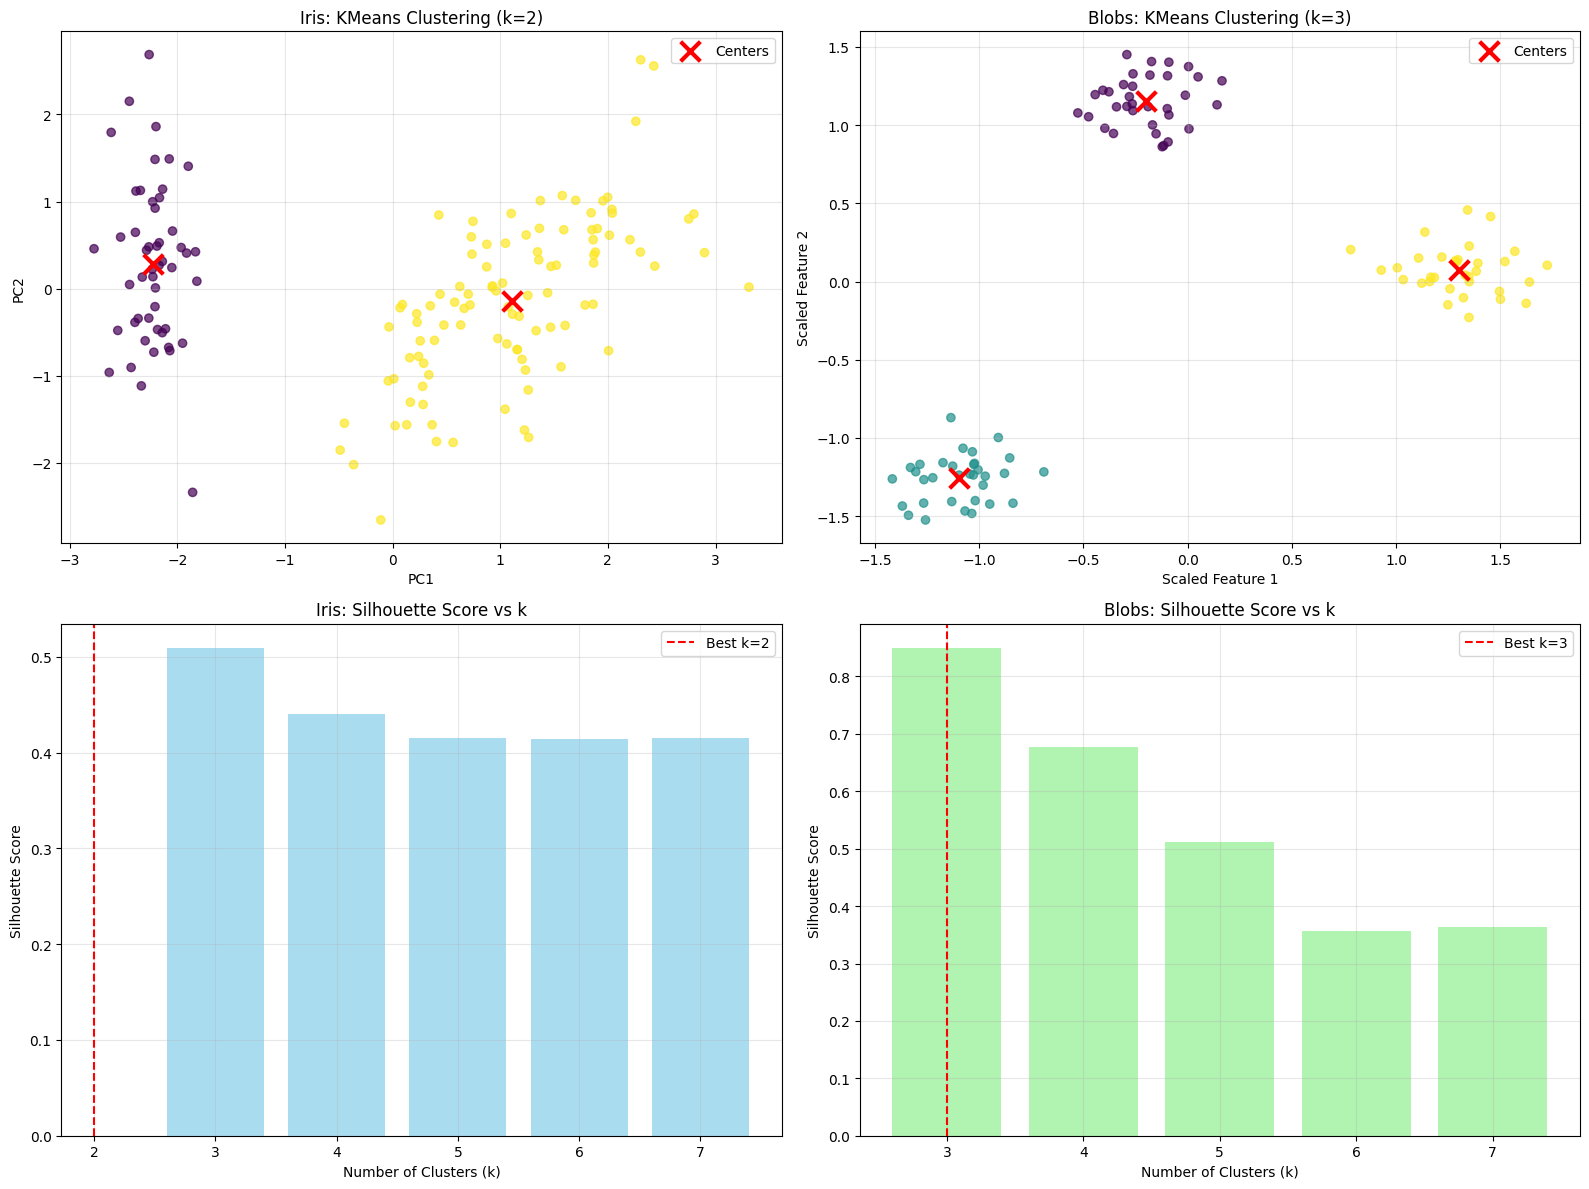

KMeans analysis completed!


In [11]:
# Visualize KMeans results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Iris clusters
ax1.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=iris_kmeans['labels'], 
           cmap='viridis', alpha=0.7)
ax1.scatter(iris_kmeans['cluster_centers'][:, 0], iris_kmeans['cluster_centers'][:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centers')
ax1.set_title(f'Iris: KMeans Clustering (k={best_k_iris})')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Blobs clusters
ax2.scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1], c=blobs_kmeans['labels'],
           cmap='viridis', alpha=0.7)
ax2.scatter(blobs_kmeans['cluster_centers'][:, 0], blobs_kmeans['cluster_centers'][:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centers')
ax2.set_title(f'Blobs: KMeans Clustering (k={best_k_blobs})')
ax2.set_xlabel('Scaled Feature 1')
ax2.set_ylabel('Scaled Feature 2')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Silhouette scores comparison
ax3.bar(iris_grid_results['k'][1:], iris_grid_results['silhouette'][1:], 
        alpha=0.7, color='skyblue')
ax3.axvline(x=best_k_iris, color='red', linestyle='--', label=f'Best k={best_k_iris}')
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Iris: Silhouette Score vs k')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.bar(blobs_grid_results['k'][1:], blobs_grid_results['silhouette'][1:], 
        alpha=0.7, color='lightgreen')
ax4.axvline(x=best_k_blobs, color='red', linestyle='--', label=f'Best k={best_k_blobs}')
ax4.set_xlabel('Number of Clusters (k)')
ax4.set_ylabel('Silhouette Score')
ax4.set_title('Blobs: Silhouette Score vs k')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("KMeans analysis completed!")

# Agglomerative Clustering

In [ ]:
print("\nPerforming Agglomerative Clustering...")

# Test different numbers of clusters
agglomerative_results = []
n_clusters_range = [2, 3, 4, 5]

print("\nAgglomerative Clustering Results:")
for n_clusters in n_clusters_range:
    # Iris
    iris_agglo = clusterer.fit_agglomerative(X_iris_scaled, n_clusters=n_clusters)
    iris_sil = evaluator.silhouette(X_iris_scaled, iris_agglo['labels'])
    
    # Blobs  
    blobs_agglo = clusterer.fit_agglomerative(X_blobs_scaled, n_clusters=n_clusters)
    blobs_sil = evaluator.silhouette(X_blobs_scaled, blobs_agglo['labels'])
    
    print(f"   n_clusters={n_clusters}: Iris={iris_sil:.3f}, Blobs={blobs_sil:.3f}")
    
    agglomerative_results.append({
        'n_clusters': n_clusters, 'iris_result': iris_agglo, 'iris_silhouette': iris_sil,
        'blobs_result': blobs_agglo, 'blobs_silhouette': blobs_sil
    })



Performing Agglomerative Clustering...

Agglomerative Clustering Results:
   n_clusters=2: Iris=0.615, Blobs=0.687
   n_clusters=3: Iris=0.511, Blobs=0.849
   n_clusters=4: Iris=0.449, Blobs=0.679
   n_clusters=5: Iris=0.404, Blobs=0.518


In [13]:
# Find best results
best_iris_agglo = max(agglomerative_results, key=lambda x: x['iris_silhouette'])
best_blobs_agglo = max(agglomerative_results, key=lambda x: x['blobs_silhouette'])

print(f"\nBest Agglomerative Results:")
print(f"   Iris: n_clusters={best_iris_agglo['n_clusters']}, "
      f"silhouette={best_iris_agglo['iris_silhouette']:.3f}")
print(f"   Blobs: n_clusters={best_blobs_agglo['n_clusters']}, "
      f"silhouette={best_blobs_agglo['blobs_silhouette']:.3f}")


Best Agglomerative Results:
   Iris: n_clusters=2, silhouette=0.615
   Blobs: n_clusters=3, silhouette=0.849


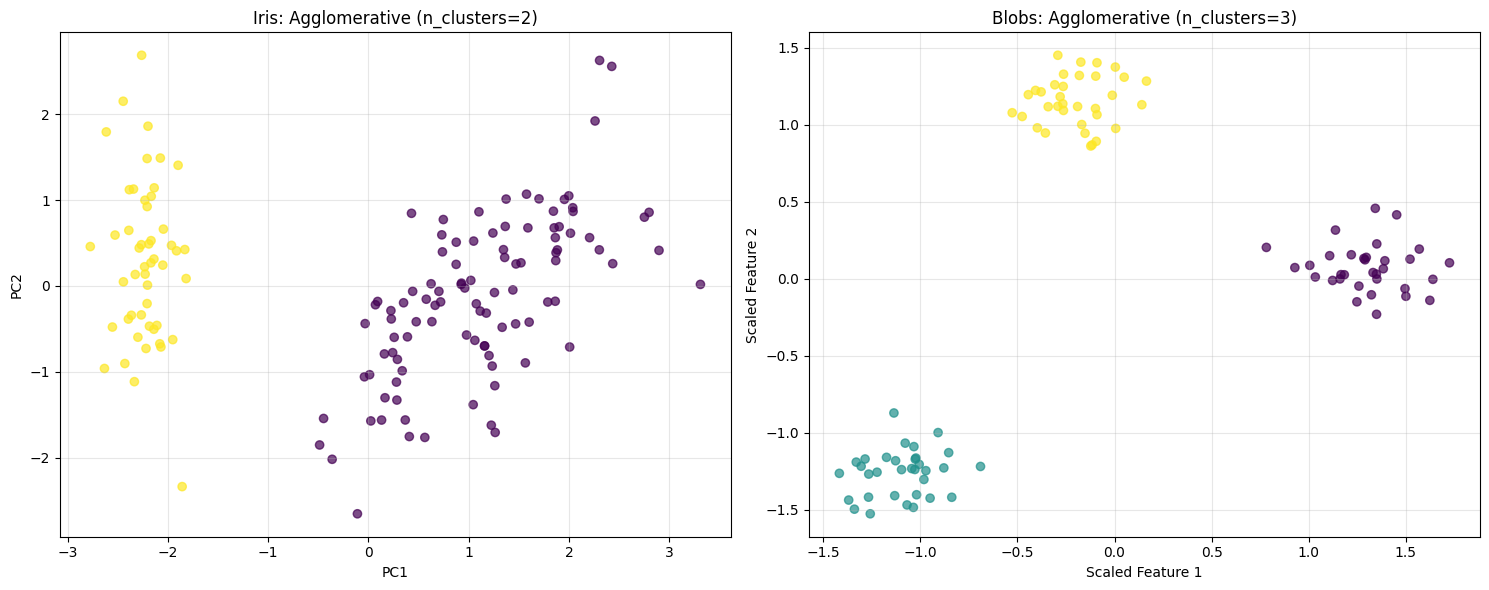

Agglomerative analysis completed!


In [20]:
# Visualize Agglomerative results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
           c=best_iris_agglo['iris_result']['labels'], cmap='viridis', alpha=0.7)
ax1.set_title(f"Iris: Agglomerative (n_clusters={best_iris_agglo['n_clusters']})")
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.grid(True, alpha=0.3)

ax2.scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1],
           c=best_blobs_agglo['blobs_result']['labels'], cmap='viridis', alpha=0.7)
ax2.set_title(f"Blobs: Agglomerative (n_clusters={best_blobs_agglo['n_clusters']})")
ax2.set_xlabel('Scaled Feature 1')  
ax2.set_ylabel('Scaled Feature 2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Agglomerative analysis completed!")

In [21]:
print("\nComprehensive Model Comparison")
print("=" * 50)

# Prepare results for comparison
iris_all_results = [
    iris_kmeans,
    iris_dbscan_best['result'] if 'iris_dbscan_best' in locals() else None,
    best_iris_agglo['iris_result']
]

blobs_all_results = [
    blobs_kmeans,
    blobs_dbscan_best['result'] if 'blobs_dbscan_best' in locals() else None,
    best_blobs_agglo['blobs_result']
]
# Remove None results
iris_all_results = [r for r in iris_all_results if r is not None]
blobs_all_results = [r for r in blobs_all_results if r is not None]

# Compare models
iris_comparison = evaluator.compare_models(iris_all_results, X_iris_scaled)
blobs_comparison = evaluator.compare_models(blobs_all_results, X_blobs_scaled)

print("\nIRIS DATASET COMPARISON:")
print(iris_comparison.round(3))

print("\nBLOBS DATASET COMPARISON:")
print(blobs_comparison.round(3))


Comprehensive Model Comparison

IRIS DATASET COMPARISON:
       Algorithm                  Parameters  N_Clusters  Silhouette  \
0         KMeans                         k=2           2       0.615   
1         DBSCAN      eps=1.0, min_samples=7           2       0.572   
2  Agglomerative  n_clusters=2, linkage=ward           2       0.615   

   Davies_Bouldin  Calinski_Harabasz  N_Noise_Points  
0           0.544            283.005               0  
1           2.628            137.942               3  
2           0.544            283.005               0  

BLOBS DATASET COMPARISON:
       Algorithm                  Parameters  N_Clusters  Silhouette  \
0         KMeans                         k=3           3       0.849   
1         DBSCAN      eps=0.3, min_samples=3           3       0.849   
2  Agglomerative  n_clusters=3, linkage=ward           3       0.849   

   Davies_Bouldin  Calinski_Harabasz  N_Noise_Points  
0            0.21           1686.708               0  
1      

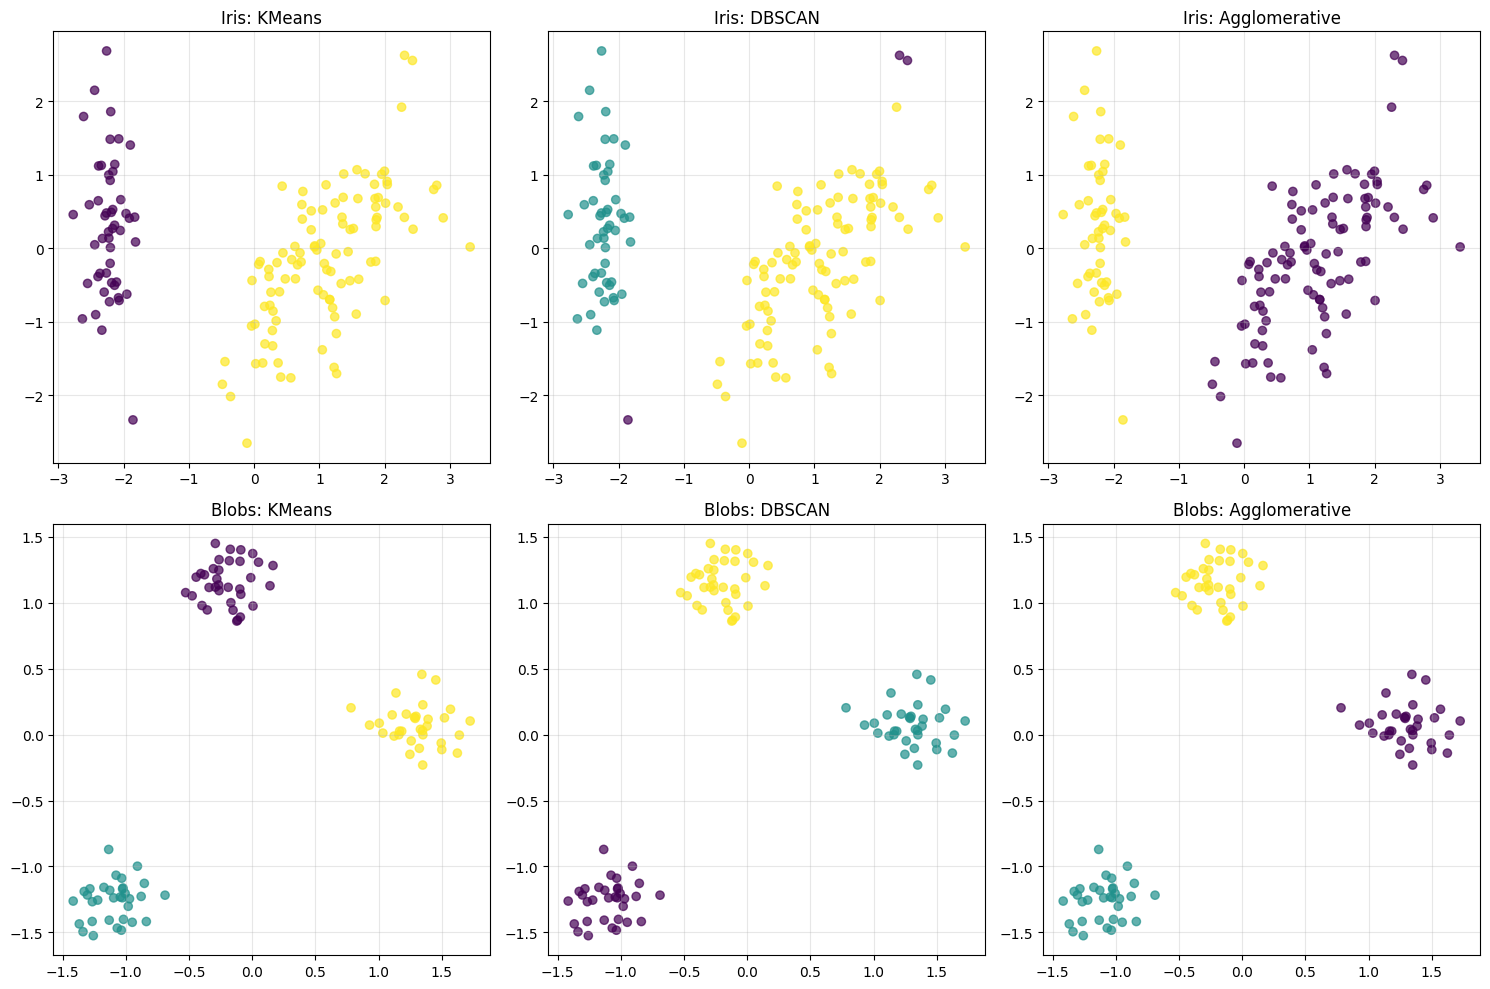

In [22]:
# Final comparison visualization
fig, axes = plt.subplots(2, len(iris_all_results), figsize=(5*len(iris_all_results), 10))

if len(iris_all_results) == 1:
    axes = axes.reshape(-1, 1)

algorithms = ['KMeans', 'DBSCAN', 'Agglomerative'][:len(iris_all_results)]

for i, (algo, iris_result, blobs_result) in enumerate(zip(algorithms, iris_all_results, blobs_all_results)):
    # Iris row
    axes[0, i].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
                      c=iris_result['labels'], cmap='viridis', alpha=0.7)
    axes[0, i].set_title(f'Iris: {algo}')
    axes[0, i].grid(True, alpha=0.3)
    
    # Blobs row
    axes[1, i].scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1],
                      c=blobs_result['labels'], cmap='viridis', alpha=0.7)
    axes[1, i].set_title(f'Blobs: {algo}')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final Result

In [23]:
def get_best_algorithm(comparison_df, metric, direction='max'):
    if direction == 'max':
        best_idx = comparison_df[metric].idxmax()
    else:
        best_idx = comparison_df[metric].idxmin()
    return comparison_df.loc[best_idx, 'Algorithm'], comparison_df.loc[best_idx, metric]

In [24]:
print("\nFINAL RECOMMENDATIONS:")

# Iris recommendations
iris_sil_best, iris_sil_score = get_best_algorithm(iris_comparison, 'Silhouette', 'max')
print(f"\nIRIS DATASET:")
print(f"   Best Algorithm: {iris_sil_best} (Silhouette: {iris_sil_score:.3f})")

# Blobs recommendations
blobs_sil_best, blobs_sil_score = get_best_algorithm(blobs_comparison, 'Silhouette', 'max')
print(f"\nBLOBS DATASET:")
print(f"   Best Algorithm: {blobs_sil_best} (Silhouette: {blobs_sil_score:.3f})")



FINAL RECOMMENDATIONS:

IRIS DATASET:
   Best Algorithm: KMeans (Silhouette: 0.615)

BLOBS DATASET:
   Best Algorithm: KMeans (Silhouette: 0.849)
